In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
%matplotlib inline
# warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/Dell/OneDrive/Documents/car.csv")

In [3]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
remove=["car_ID","enginesize","peakrpm","aspiration","symboling","fuelsystem","curbweight","carheight","carlength","carwidth","boreratio","stroke","compressionratio","citympg","highwaympg"]
df.drop(remove,axis=1,inplace=True)
df.tail(2)

,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,horsepower,price
203,volvo 246,diesel,four,sedan,rwd,front,109.1,ohc,six,106,22470.0
204,volvo 264gl,gas,four,sedan,rwd,front,109.1,ohc,four,114,22625.0


In [5]:
df.shape

(205, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    object 
 9   horsepower      205 non-null    int64  
 10  price           205 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.7+ KB


In [7]:
df.dtypes

CarName            object
fueltype           object
doornumber         object
carbody            object
drivewheel         object
enginelocation     object
wheelbase         float64
enginetype         object
cylindernumber     object
horsepower          int64
price             float64
dtype: object

In [8]:
df.isna().sum()

CarName           0
fueltype          0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
wheelbase         0
enginetype        0
cylindernumber    0
horsepower        0
price             0
dtype: int64

In [9]:
df.describe()

,wheelbase,horsepower,price
count,205.000000,205.000000,205.000000
mean,98.756585,104.117073,13276.710571
std,6.021776,39.544167,7988.852332
min,86.600000,48.000000,5118.000000
25%,94.500000,70.000000,7788.000000
50%,97.000000,95.000000,10295.000000
75%,102.400000,116.000000,16503.000000
max,120.900000,288.000000,45400.000000


In [10]:
obj=df.select_dtypes("O")

In [11]:
for i in obj.columns:
    print(obj[i].value_counts())
    print("--------------------------")

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
--------------------------
gas       185
diesel     20
Name: fueltype, dtype: int64
--------------------------
four    115
two      90
Name: doornumber, dtype: int64
--------------------------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
--------------------------
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
--------------------------
front    202
rear       3
Name: enginelocation, dtype: int64
--------------------------
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
--------------------------
four   

In [12]:
df["fueltype"]=df["fueltype"].map({"gas":0,"diesel":1})

In [13]:
df["doornumber"]=df["doornumber"].map({"two":0,"four":1})

In [14]:
df["carbody"]=df["carbody"].map({"sedan":0,"hatchback":1,"wagon":2,"hardtop":3,"convertible":4})

In [15]:
df["drivewheel"]=df["drivewheel"].map({"fwd":0,"rwd":1,"4wd":2})

In [16]:
df["enginelocation"]=df["enginelocation"].map({"front":0,"rear":1})

In [17]:
df["enginetype"]=df["enginetype"].map({"ohc":0,"ohcf":1,"ohcv":2,"dohc":3,"l":4,"rotor":5,"dohcv":6})

In [18]:
df["cylindernumber"]=df["cylindernumber"].map({"four":0,"six":1,"five":2,"eight":3,"two":4,"three":5,"twelve":6})

In [19]:
df.head(10)

,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,horsepower,price
0,alfa-romero giulia,0,0,4,1,0,88.6,3,0,111,13495.000
1,alfa-romero stelvio,0,0,4,1,0,88.6,3,0,111,16500.000
2,alfa-romero Quadrifoglio,0,0,1,1,0,94.5,2,1,154,16500.000
3,audi 100 ls,0,1,0,0,0,99.8,0,0,102,13950.000
4,audi 100ls,0,1,0,2,0,99.4,0,2,115,17450.000
5,audi fox,0,0,0,0,0,99.8,0,2,110,15250.000
6,audi 100ls,0,1,0,0,0,105.8,0,2,110,17710.000
7,audi 5000,0,1,2,0,0,105.8,0,2,110,18920.000
8,audi 4000,0,1,0,0,0,105.8,0,2,140,23875.000
9,audi 5000s (diesel),0,0,1,2,0,99.5,0,2,160,17859.167


In [20]:
le=preprocessing.LabelEncoder()
df["CarName"]=le.fit_transform(df["CarName"])
df["CarName"].unique()

array([  2,   3,   1,   4,   5,   9,   7,   6,   8,  10,  11,  12,  15,
        13,  14,  24,  25,  26,  35,  27,  32,  34,  29,  28,  30,  33,
        31,  39,  43,  37,  38,  42,  36,  41,  44,  40,  47,  45,  46,
        49,  48,  50,  52,  51,  61,  59,  58,  53,  54,  60,  55,  57,
        56,  19,  17,  16,  22,  20,  23,  18,  21,  62,  65,  64,  68,
        63,  66,  67,  69,   0,  73,  81,  76,  83,  77,  74,  78,  70,
        79,  71,  72,  80,  82,  75,  85,  84,  86,  88,  87,  92,  89,
        93,  91,  94,  90,  98,  95,  97,  96,  99, 100, 101, 103, 102,
       104, 107, 106, 105, 108, 109, 110, 111, 123, 120, 116, 121, 117,
       112, 125, 115, 118, 114, 119, 122, 126, 127, 124, 113, 128, 129,
       130, 133, 137, 131, 136, 132, 145, 146, 134, 135, 139, 138, 140,
       141, 143, 144, 142])

In [21]:
df.head(10)

,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,horsepower,price
0,2,0,0,4,1,0,88.6,3,0,111,13495.000
1,3,0,0,4,1,0,88.6,3,0,111,16500.000
2,1,0,0,1,1,0,94.5,2,1,154,16500.000
3,4,0,1,0,0,0,99.8,0,0,102,13950.000
4,5,0,1,0,2,0,99.4,0,2,115,17450.000
5,9,0,0,0,0,0,99.8,0,2,110,15250.000
6,5,0,1,0,0,0,105.8,0,2,110,17710.000
7,7,0,1,2,0,0,105.8,0,2,110,18920.000
8,6,0,1,0,0,0,105.8,0,2,140,23875.000
9,8,0,0,1,2,0,99.5,0,2,160,17859.167


In [22]:
df.columns

Index(['CarName', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'enginetype', 'cylindernumber',
       'horsepower', 'price'],
      dtype='object')

In [23]:
X=df.drop("price",axis=1)
y=df["price"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
mo= {"Linear_Regression":LinearRegression(),
    "Support_vector_regression":SVR(),
    "Random_Forest_regression":RandomForestRegressor(n_estimators=60),
    "Decision_tree_regressor":DecisionTreeRegressor(),
    "Gradient_boosting": GradientBoostingRegressor()}

In [28]:
def fit_score(model,x_train,x_test,y_train,y_test):
    
    test_score={}
    train_score={}
    y_train_pred={}
    y_test_pred={}
    
    for name, i in model.items():
        i.fit(x_train,y_train)
        
        test_score[name]= i.score(x_test,y_test)
        train_score[name]= i.score(x_train,y_train)
        y_train_pred[name]= i.predict(X_train)
        y_test_pred[name]= i.predict(X_test)
        
        
    test= pd.DataFrame(test_score,index=["Test_Accuracy"]).transpose()
    test["Train_Accuracy"]=train_score.values()
    predict=pd.DataFrame(y_test_pred)
    predict["Actual_value"]= np.array(y_test)
    return test, predict

In [29]:
test, predict= fit_score(mo, x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test)

In [30]:
test["Difference"]= test["Test_Accuracy"]-test["Train_Accuracy"]

<Figure size 1200x800 with 0 Axes>

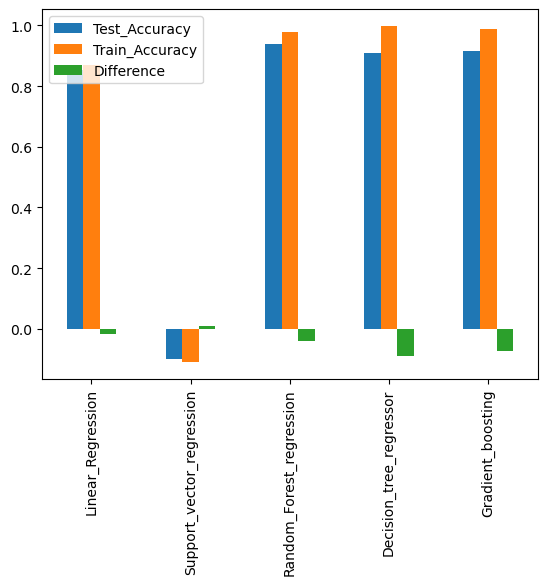

In [31]:
plt.figure(figsize=(12,8))
test.plot.bar()
plt.legend(loc=2);

In [32]:
test["Difference"]= test["Difference"]*100

In [33]:
test

,Test_Accuracy,Train_Accuracy,Difference
Linear_Regression,0.852259,0.869064,-1.680488
Support_vector_regression,-0.100212,-0.108788,0.857571
Random_Forest_regression,0.939105,0.978398,-3.929284
Decision_tree_regressor,0.908328,0.998640,-9.031247
Gradient_boosting,0.917181,0.989241,-7.205934


In [34]:
rf=RandomForestRegressor().fit(X_train,y_train)

In [35]:
rf.score(X_test,y_test)

0.9359441160408312

In [36]:
rf.score(X_train,y_train)

0.9757755734353557

In [37]:
data={"CarName":2 ,
      "fueltype":1,
      "doornumber":1,
      "carbody":4,
      "drivewheel":2,
      "enginelocation":1,
      "wheelbase":150.6,
      "enginetype":2,
      "cylindernumber":2,
       "horsepower":160}

In [38]:
new=pd.DataFrame(data,index=[0])

In [39]:
new

,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,horsepower
0,2,1,1,4,2,1,150.6,2,2,160


In [40]:
predict=rf.predict(new)
"Your New Car Price Will be {}".format(predict[0])

'Your New Car Price Will be 31149.43'